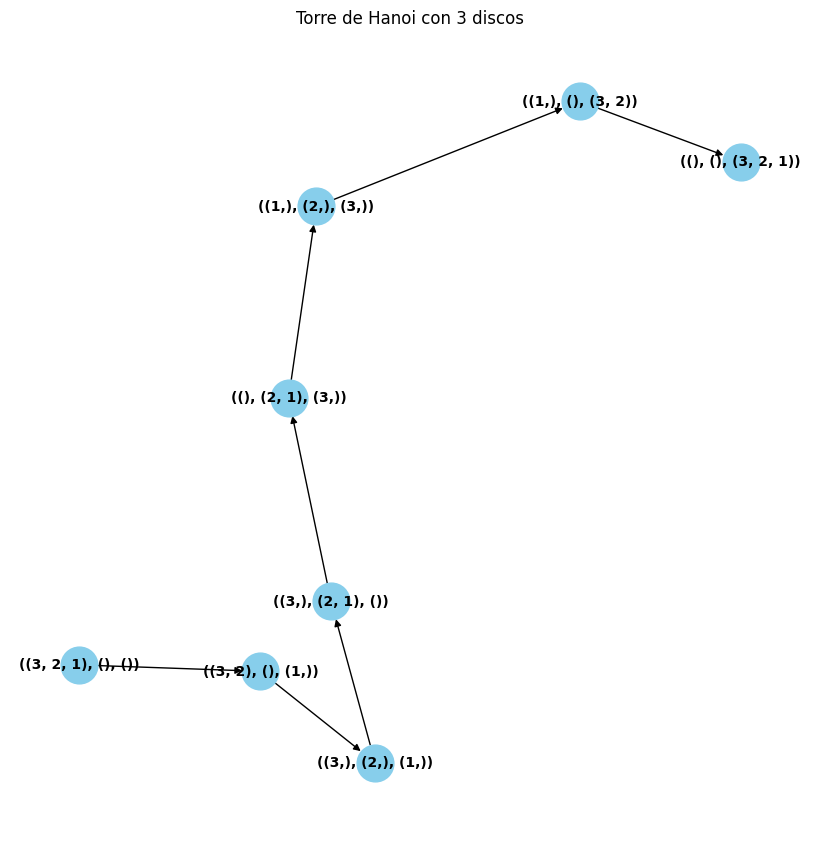

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def hanoi_graph(n):
    # Crea un grafo dirigido
    G = nx.DiGraph()
    
    # Función recursiva para generar los movimientos y estados
    def generate_states(n, source, target, auxiliary, state):
        if n == 1:
            # Mover el disco más pequeño de la torre "source" a la torre "target"
            move(source, target, state)
        else:
            generate_states(n-1, source, auxiliary, target, state)
            move(source, target, state)
            generate_states(n-1, auxiliary, target, source, state)
    
    # Mover disco de la torre "source" a la torre "target"
    def move(source, target, state):
        # Crea una copia profunda del estado actual
        new_state = [list(t) for t in state]  # Creamos una copia de las torres
        
        # Mover el disco superior de la torre "source" a la torre "target"
        disk = new_state[source].pop()
        new_state[target].append(disk)
        
        # Añadir el estado actual y el nuevo estado al grafo como un borde
        G.add_edge(tuple(map(tuple, state)), tuple(map(tuple, new_state)))
        
        # Actualizar el estado actual al nuevo estado
        state[:] = new_state  # Modificamos el estado en lugar de reasignarlo
    
    # Estado inicial: todos los discos en la primera torre
    initial_state = [list(range(n, 0, -1)), [], []]
    generate_states(n, 0, 2, 1, initial_state)  # Mover de torre 0 a torre 2 usando la torre 1 como auxiliar
    
    return G

# Número de discos
n = 3
G = hanoi_graph(n)

# Dibujar el grafo
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G)  # Layout del grafo
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
plt.title(f"Torre de Hanoi con {n} discos")
plt.show()


In [4]:
import networkx as nx
from collections import deque

def bfs_hanoi(n):
    # Crea un grafo vacío
    G = nx.DiGraph()

    # Estado inicial (todos los discos en la torre 0)
    initial_state = (tuple(range(n, 0, -1)), (), ())

    # Estado objetivo (todos los discos en la torre 2)
    goal_state = ((), (), tuple(range(n, 0, -1)))

    # Cola para BFS y un conjunto para verificar los estados ya visitados
    queue = deque([(initial_state, [])])  # Guarda el estado actual y el camino recorrido
    visited = set()
    
    # BFS loop
    while queue:
        current_state, path = queue.popleft()

        if current_state == goal_state:
            return path  # Retornar el camino encontrado

        if current_state in visited:
            continue
        
        visited.add(current_state)

        # Generar movimientos posibles
        for source in range(3):  # Tres torres
            for target in range(3):
                if source != target and current_state[source]:
                    new_state = list(map(list, current_state))  # Copiar el estado actual
                    disk = new_state[source].pop()  # Quitar el disco más pequeño de la torre source
                    new_state[target].append(disk)  # Moverlo a la torre target
                    new_state = tuple(map(tuple, new_state))  # Convertir a tupla para que sea hashable
                    
                    if new_state not in visited:
                        G.add_edge(current_state, new_state)
                        queue.append((new_state, path + [(source, target)]))
    
    return None  # Si no hay solución (no debería pasar en Torres de Hanoi)

# Ejecutar el BFS para 3 discos
n = 3
solution = bfs_hanoi(n)

print(f"Solución BFS con {n} discos: {solution}")


Solución BFS con 3 discos: [(0, 1), (0, 1), (0, 2), (1, 2), (1, 2)]


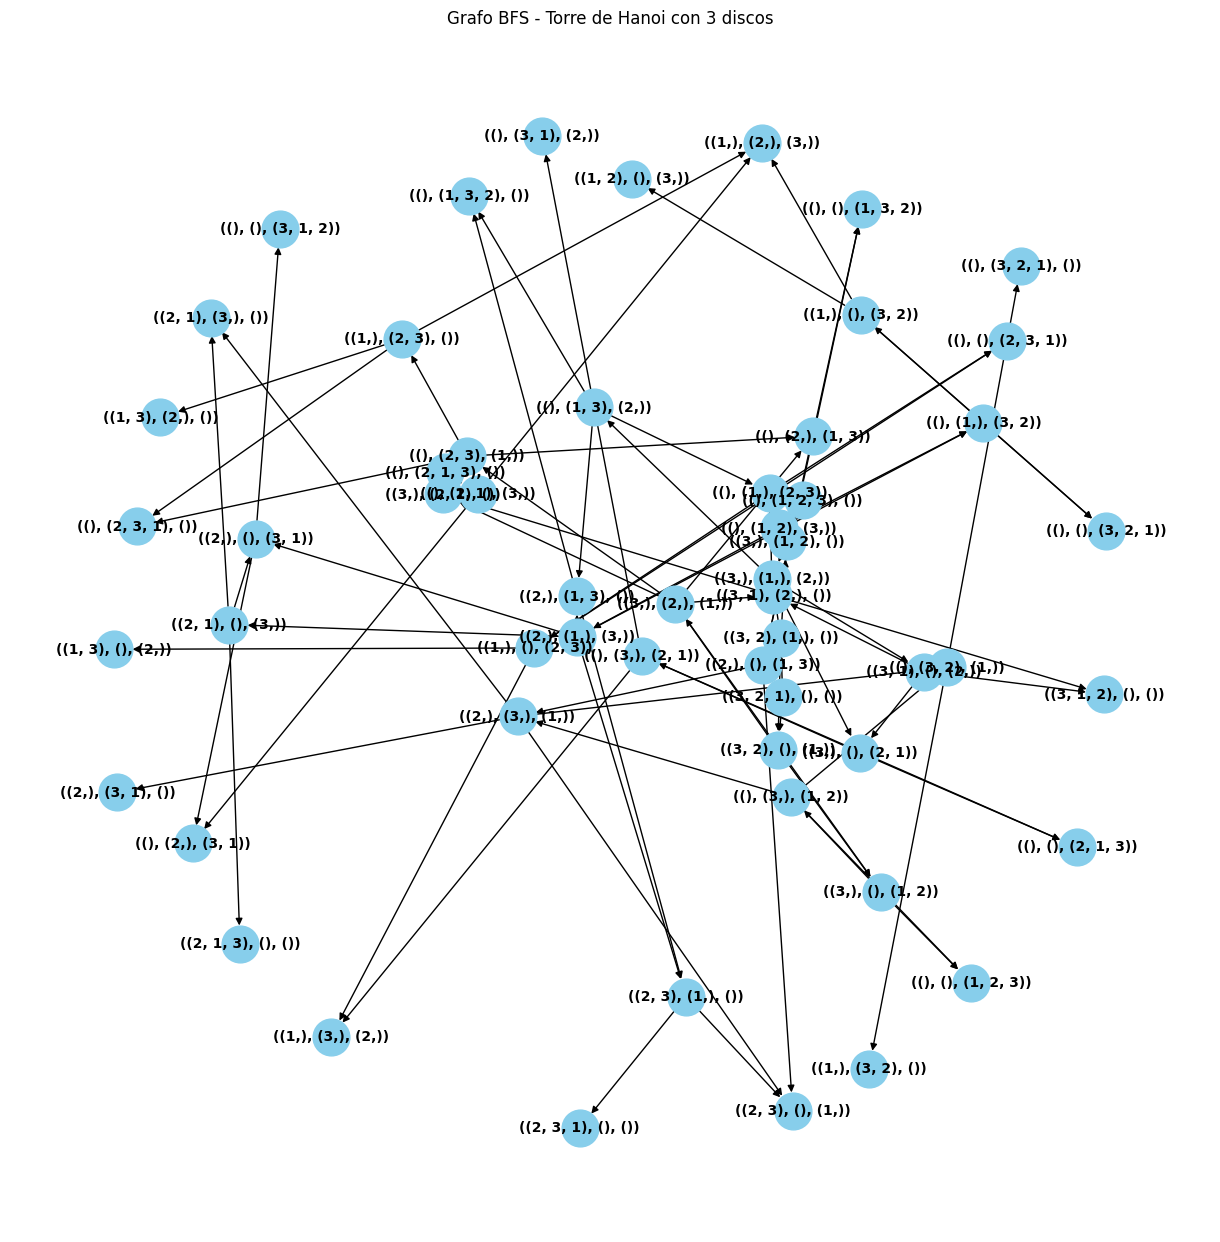

Solución BFS con 3 discos: [(0, 1), (0, 1), (0, 2), (1, 2), (1, 2)]


In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

def bfs_hanoi_graph(n):
    # Crea un grafo vacío
    G = nx.DiGraph()

    # Estado inicial (todos los discos en la torre 0)
    initial_state = (tuple(range(n, 0, -1)), (), ())

    # Estado objetivo (todos los discos en la torre 2)
    goal_state = ((), (), tuple(range(n, 0, -1)))

    # Cola para BFS y un conjunto para verificar los estados ya visitados
    queue = deque([(initial_state, [])])  # Guarda el estado actual y el camino recorrido
    visited = set()

    # BFS loop
    while queue:
        current_state, path = queue.popleft()

        if current_state == goal_state:
            return G, path  # Retornar el grafo y el camino encontrado

        if current_state in visited:
            continue

        visited.add(current_state)

        # Generar movimientos posibles
        for source in range(3):  # Tres torres
            for target in range(3):
                if source != target and current_state[source]:
                    new_state = list(map(list, current_state))  # Copiar el estado actual
                    disk = new_state[source].pop()  # Quitar el disco más pequeño de la torre source
                    new_state[target].append(disk)  # Moverlo a la torre target
                    new_state = tuple(map(tuple, new_state))  # Convertir a tupla para que sea hashable

                    if new_state not in visited:
                        G.add_edge(current_state, new_state)  # Añadir la transición como una arista en el grafo
                        queue.append((new_state, path + [(source, target)]))

    return G, None  # Si no hay solución (no debería pasar en Torres de Hanoi)

# Ejecutar el BFS para 3 discos y generar el grafo
n = 3
G, solution = bfs_hanoi_graph(n)

# Visualizar el grafo
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # Posiciones de los nodos para la visualización
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
plt.title(f"Grafo BFS - Torre de Hanoi con {n} discos")
plt.show()

# Imprimir la solución en pasos
print(f"Solución BFS con {n} discos: {solution}")


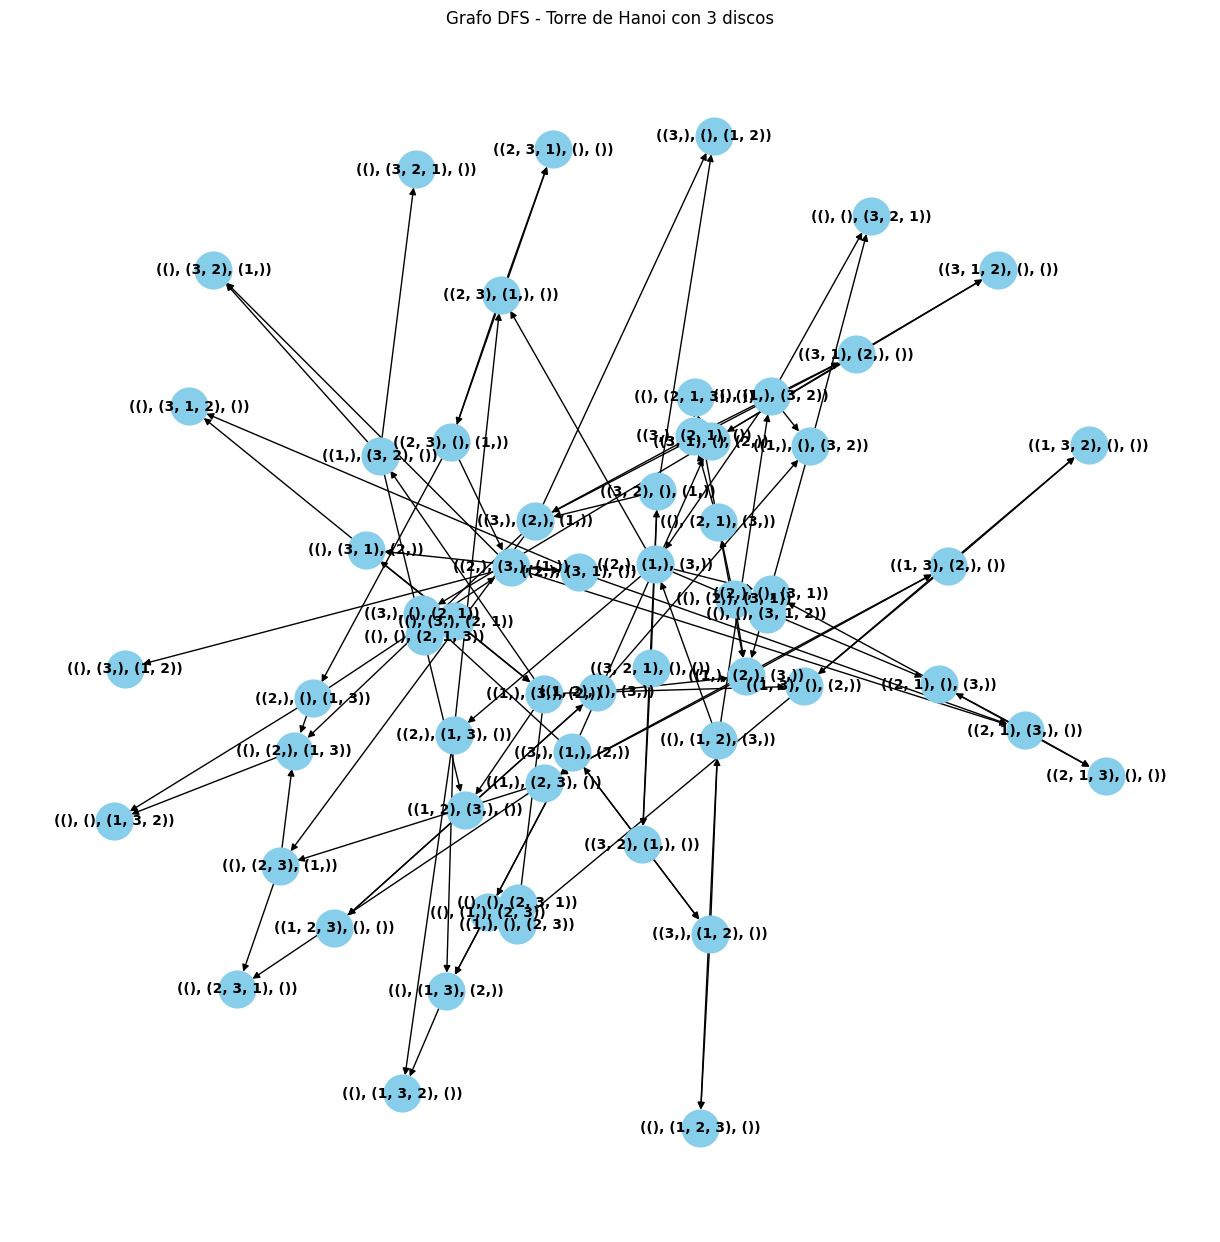

Solución DFS con 3 discos: [(0, 2), (2, 1), (0, 2), (2, 1), (0, 2), (1, 2), (2, 0), (2, 1), (1, 0), (1, 2), (0, 2), (2, 1), (2, 1), (1, 0), (1, 2), (0, 2), (0, 2), (2, 1), (2, 1), (2, 1), (1, 0), (1, 2), (2, 0), (1, 2), (0, 2), (0, 2), (2, 1), (2, 1), (1, 0), (2, 1), (1, 0), (1, 2), (0, 2), (0, 2)]


In [6]:
import networkx as nx
import matplotlib.pyplot as plt

def dfs_hanoi_graph(n):
    # Crea un grafo vacío
    G = nx.DiGraph()

    # Estado inicial (todos los discos en la torre 0)
    initial_state = (tuple(range(n, 0, -1)), (), ())

    # Estado objetivo (todos los discos en la torre 2)
    goal_state = ((), (), tuple(range(n, 0, -1)))

    # Pila para DFS y un conjunto para verificar los estados ya visitados
    stack = [(initial_state, [])]  # Guarda el estado actual y el camino recorrido
    visited = set()

    # DFS loop
    while stack:
        current_state, path = stack.pop()

        if current_state == goal_state:
            return G, path  # Retornar el grafo y el camino encontrado

        if current_state in visited:
            continue

        visited.add(current_state)

        # Generar movimientos posibles
        for source in range(3):  # Tres torres
            for target in range(3):
                if source != target and current_state[source]:
                    new_state = list(map(list, current_state))  # Copiar el estado actual
                    disk = new_state[source].pop()  # Quitar el disco más pequeño de la torre source
                    new_state[target].append(disk)  # Moverlo a la torre target
                    new_state = tuple(map(tuple, new_state))  # Convertir a tupla para que sea hashable

                    if new_state not in visited:
                        G.add_edge(current_state, new_state)  # Añadir la transición como una arista en el grafo
                        stack.append((new_state, path + [(source, target)]))

    return G, None  # Si no hay solución (no debería pasar en Torres de Hanoi)

# Ejecutar el DFS para 3 discos y generar el grafo
n = 3
G, solution = dfs_hanoi_graph(n)

# Visualizar el grafo
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # Posiciones de los nodos para la visualización
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
plt.title(f"Grafo DFS - Torre de Hanoi con {n} discos")
plt.show()

# Imprimir la solución en pasos
print(f"Solución DFS con {n} discos: {solution}")


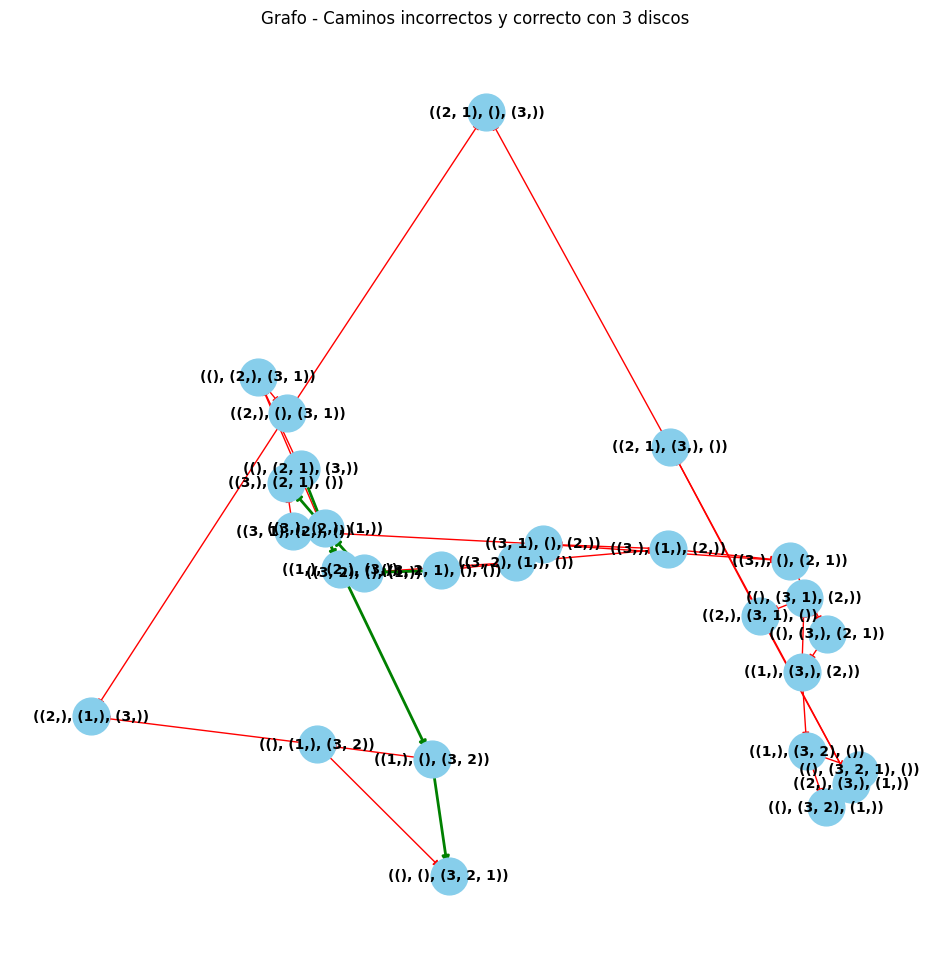

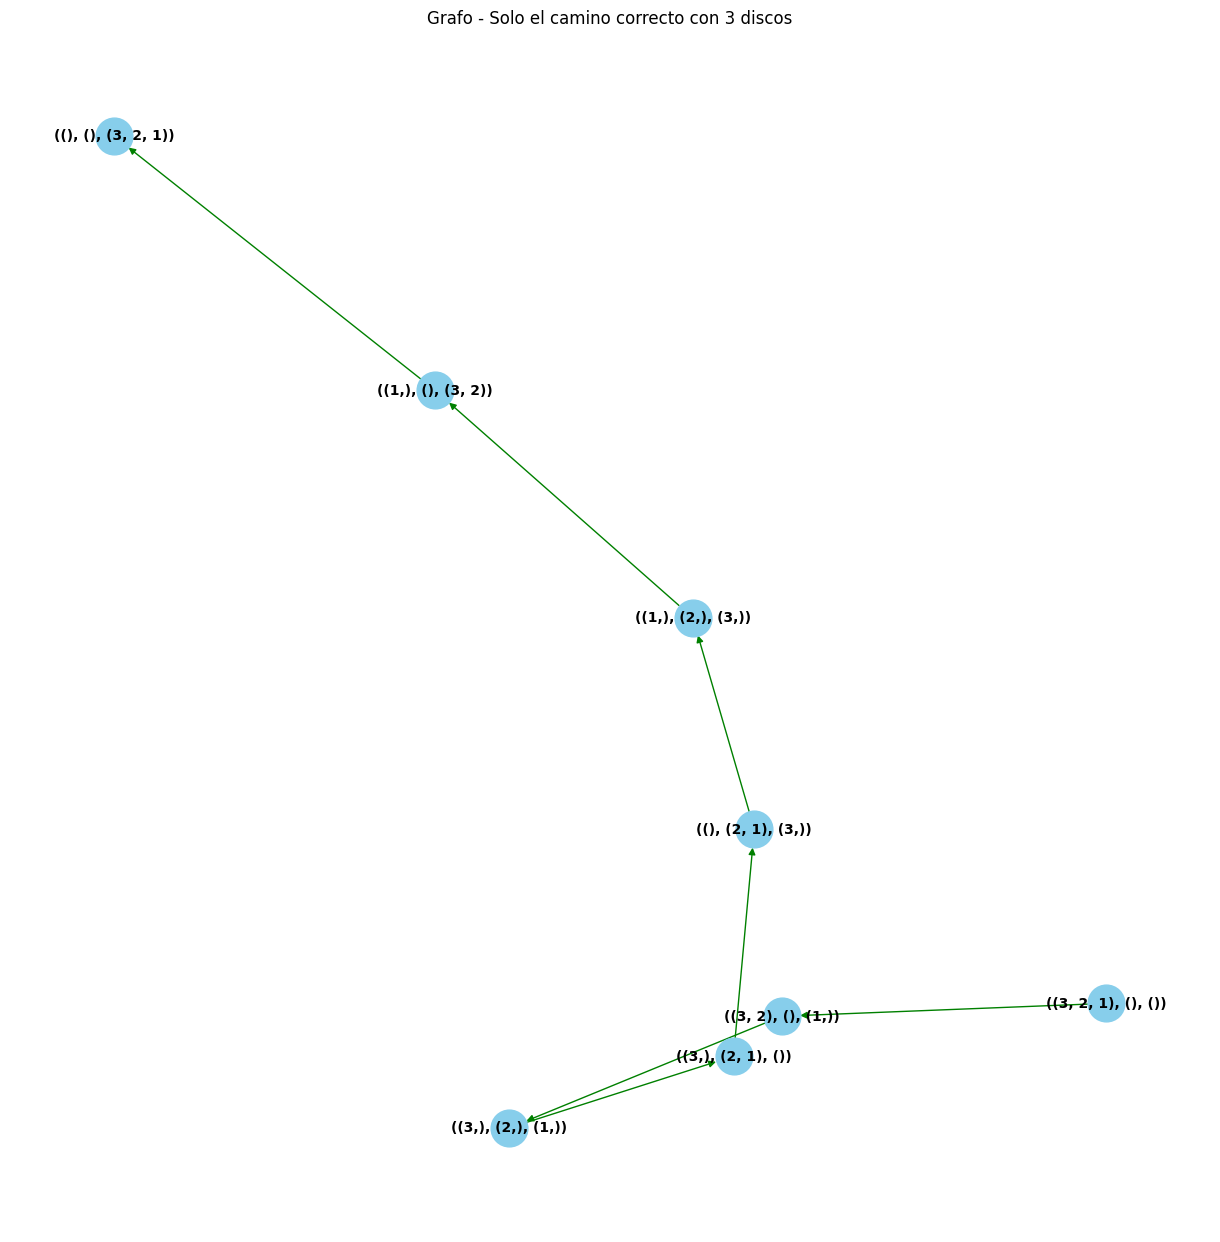

Solución BFS con 3 discos: [(0, 2), (0, 1), (2, 1), (0, 2), (1, 0), (1, 2), (0, 2)]


In [9]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

def bfs_hanoi_graph(n):
    # Crea un grafo vacío
    G = nx.DiGraph()

    # Estado inicial (todos los discos en la torre 0)
    initial_state = (tuple(range(n, 0, -1)), (), ())

    # Estado objetivo (todos los discos en la torre 2)
    goal_state = ((), (), tuple(range(n, 0, -1)))

    # Cola para BFS y un conjunto para verificar los estados ya visitados
    queue = deque([(initial_state, [])])  # Guarda el estado actual y el camino recorrido
    visited = set()

    # BFS loop
    while queue:
        current_state, path = queue.popleft()

        if current_state == goal_state:
            return G, path  # Retornar el grafo y el camino encontrado

        if current_state in visited:
            continue

        visited.add(current_state)

        # Generar movimientos posibles
        for source in range(3):  # Tres torres
            if current_state[source]:
                disk_to_move = current_state[source][-1]  # Disco a mover
                for target in range(3):
                    if source != target:
                        # Verificar si podemos colocar el disco en la torre objetivo
                        if not current_state[target] or current_state[target][-1] > disk_to_move:
                            new_state = list(map(list, current_state))  # Copiar el estado actual
                            new_state[source].pop()  # Quitar el disco de la torre source
                            new_state[target].append(disk_to_move)  # Colocar el disco en la torre target
                            new_state = tuple(map(tuple, new_state))  # Convertir a tupla para que sea hashable

                            if new_state not in visited:
                                G.add_edge(current_state, new_state)  # Añadir la transición como una arista en el grafo
                                queue.append((new_state, path + [(source, target)]))

    return G, None  # Si no hay solución (no debería pasar en Torres de Hanoi)

def draw_solution_paths(G, solution, n):
    # Crear subgrafos para caminos correctos e incorrectos
    correct_edges = []
    incorrect_edges = []

    # Crear lista de estados a partir del camino de solución
    if solution:
        solution_states = [()]
        current_state = (tuple(range(n, 0, -1)), (), ())
        solution_states = [current_state]  # Lista de estados en el camino de solución
        for move in solution:
            source, target = move
            current_state = list(map(list, current_state))
            disk = current_state[source].pop()
            current_state[target].append(disk)
            current_state = tuple(map(tuple, current_state))
            solution_states.append(current_state)

        # Rellenar aristas correctas e incorrectas
        for edge in G.edges():
            if edge in zip(solution_states[:-1], solution_states[1:]):
                correct_edges.append(edge)
            else:
                incorrect_edges.append(edge)

    # Grafo 1: Visualización general de todos los caminos incorrectos y el correcto en verde
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)  # Posiciones de los nodos para la visualización
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_weight='bold')

    # Dibujar aristas incorrectas en rojo
    nx.draw_networkx_edges(G, pos, edgelist=incorrect_edges, edge_color='red')
    # Dibujar aristas correctas en verde
    nx.draw_networkx_edges(G, pos, edgelist=correct_edges, edge_color='green', width=2)

    plt.title(f"Grafo - Caminos incorrectos y correcto con {n} discos")
    plt.axis('off')
    plt.show()

    # Grafo 2: Visualización simplificada solo con el camino correcto
    plt.figure(figsize=(12, 12))
    G_simplified = nx.DiGraph()
    G_simplified.add_edges_from(correct_edges)  # Solo añadir las aristas correctas al nuevo grafo
    pos_simplified = nx.spring_layout(G_simplified)  # Layout para el grafo simplificado
    nx.draw(G_simplified, pos_simplified, with_labels=True, node_size=700, edge_color='green', node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
    plt.title(f"Grafo - Solo el camino correcto con {n} discos")
    plt.axis('off')
    plt.show()

# Ejecutar el BFS para 3 discos y generar el grafo
n = 3
G, solution = bfs_hanoi_graph(n)

# Visualizar los caminos correctos e incorrectos
draw_solution_paths(G, solution, n)

# Imprimir la solución en pasos
print(f"Solución BFS con {n} discos: {solution}")


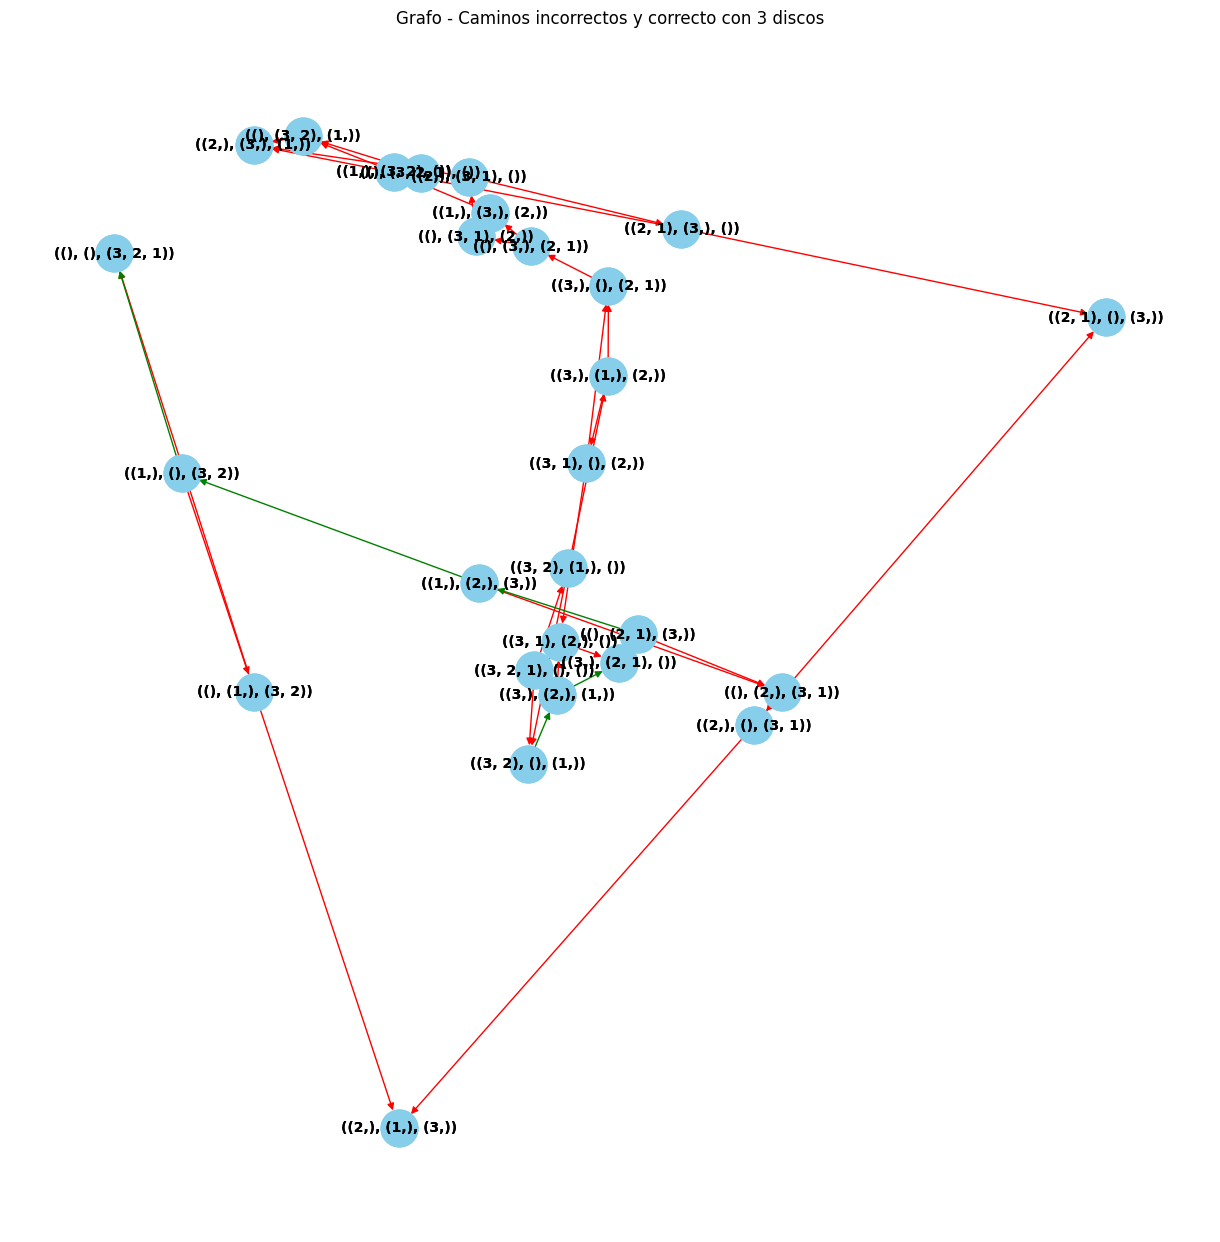

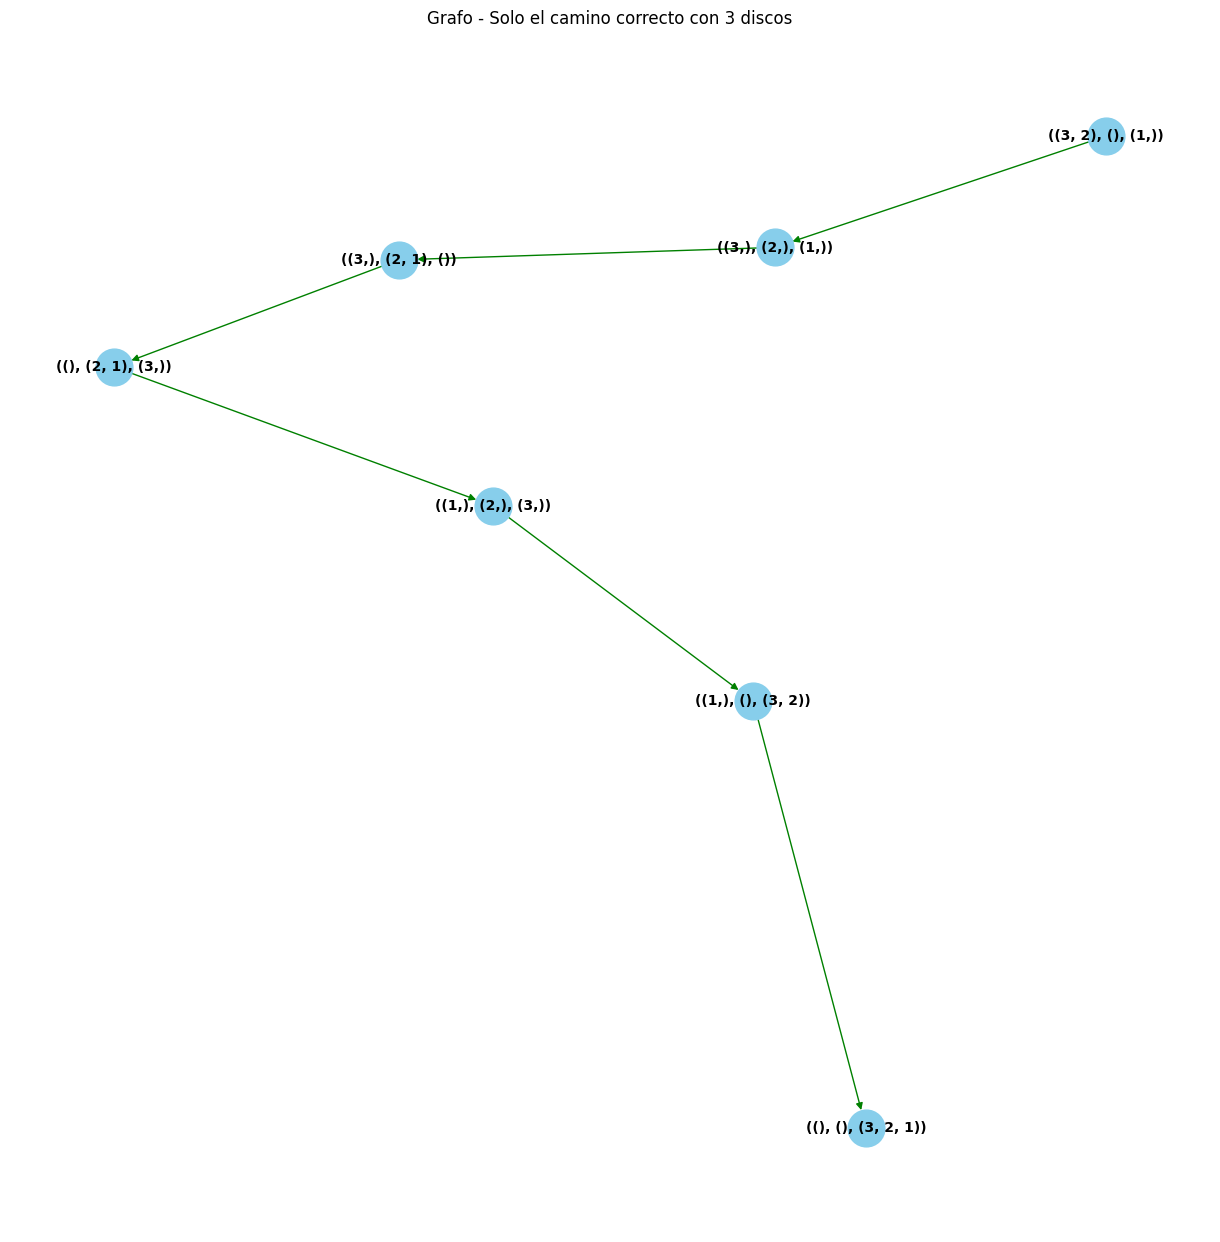

Solución BFS con 3 discos: [(0, 2), (0, 1), (2, 1), (0, 2), (1, 0), (1, 2), (0, 2)]


In [10]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

def bfs_hanoi_graph(n):
    # Crea un grafo vacío
    G = nx.DiGraph()

    # Estado inicial (todos los discos en la torre 0)
    initial_state = (tuple(range(n, 0, -1)), (), ())

    # Estado objetivo (todos los discos en la torre 2)
    goal_state = ((), (), tuple(range(n, 0, -1)))

    # Cola para BFS y un conjunto para verificar los estados ya visitados
    queue = deque([(initial_state, [])])  # Guarda el estado actual y el camino recorrido
    visited = set()

    # BFS loop
    while queue:
        current_state, path = queue.popleft()

        if current_state == goal_state:
            return G, path  # Retornar el grafo y el camino encontrado

        if current_state in visited:
            continue

        visited.add(current_state)

        # Generar movimientos posibles
        for source in range(3):  # Tres torres
            if current_state[source]:  # Verificar si hay discos en la torre source
                disk_to_move = current_state[source][-1]  # Disco más pequeño de la torre source
                for target in range(3):
                    if source != target:  # No mover a la misma torre
                        # Regla 1: Solo se puede mover un disco a la vez (esto se cumple automáticamente)
                        # Regla 2: Un disco grande no puede colocarse sobre un disco pequeño
                        if not current_state[target] or disk_to_move < current_state[target][-1]:
                            new_state = list(map(list, current_state))  # Copiar el estado actual
                            new_state[source].pop()  # Quitar el disco de la torre source
                            new_state[target].append(disk_to_move)  # Moverlo a la torre target
                            new_state = tuple(map(tuple, new_state))  # Convertir a tupla para que sea hashable

                            if new_state not in visited:
                                G.add_edge(current_state, new_state)  # Añadir la transición como una arista en el grafo
                                queue.append((new_state, path + [(source, target)]))

    return G, None  # Si no hay solución (no debería pasar en Torres de Hanoi)

def draw_solution_paths(G, solution, n):
    # Crear subgrafos para caminos correctos e incorrectos
    correct_edges = []
    incorrect_edges = []

    # Crear lista de estados a partir del camino de solución
    if solution:
        solution_states = [()]
        current_state = (tuple(range(n, 0, -1)), (), ())
        for move in solution:
            source, target = move
            current_state = list(map(list, current_state))
            disk = current_state[source].pop()
            current_state[target].append(disk)
            current_state = tuple(map(tuple, current_state))
            solution_states.append(current_state)

        # Rellenar aristas correctas e incorrectas
        for edge in G.edges():
            if edge in zip(solution_states[:-1], solution_states[1:]):
                correct_edges.append(edge)
            else:
                incorrect_edges.append(edge)

    # Grafo 1: Visualización general de todos los caminos incorrectos y el correcto en verde
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)  # Posiciones de los nodos para la visualización
    nx.draw(G, pos, with_labels=True, node_size=700, edge_color='red', edgelist=incorrect_edges, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
    nx.draw(G, pos, with_labels=True, node_size=700, edge_color='green', edgelist=correct_edges, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
    plt.title(f"Grafo - Caminos incorrectos y correcto con {n} discos")
    plt.show()

    # Grafo 2: Visualización simplificada solo con el camino correcto
    plt.figure(figsize=(12, 12))
    G_simplified = nx.DiGraph()
    G_simplified.add_edges_from(correct_edges)  # Solo añadir las aristas correctas al nuevo grafo
    pos_simplified = nx.spring_layout(G_simplified)  # Layout para el grafo simplificado
    nx.draw(G_simplified, pos_simplified, with_labels=True, node_size=700, edge_color='green', node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
    plt.title(f"Grafo - Solo el camino correcto con {n} discos")
    plt.show()

# Ejecutar el BFS para 3 discos y generar el grafo
n = 3
G, solution = bfs_hanoi_graph(n)

# Visualizar los caminos correctos e incorrectos
draw_solution_paths(G, solution, n)

# Imprimir la solución en pasos
print(f"Solución BFS con {n} discos: {solution}")


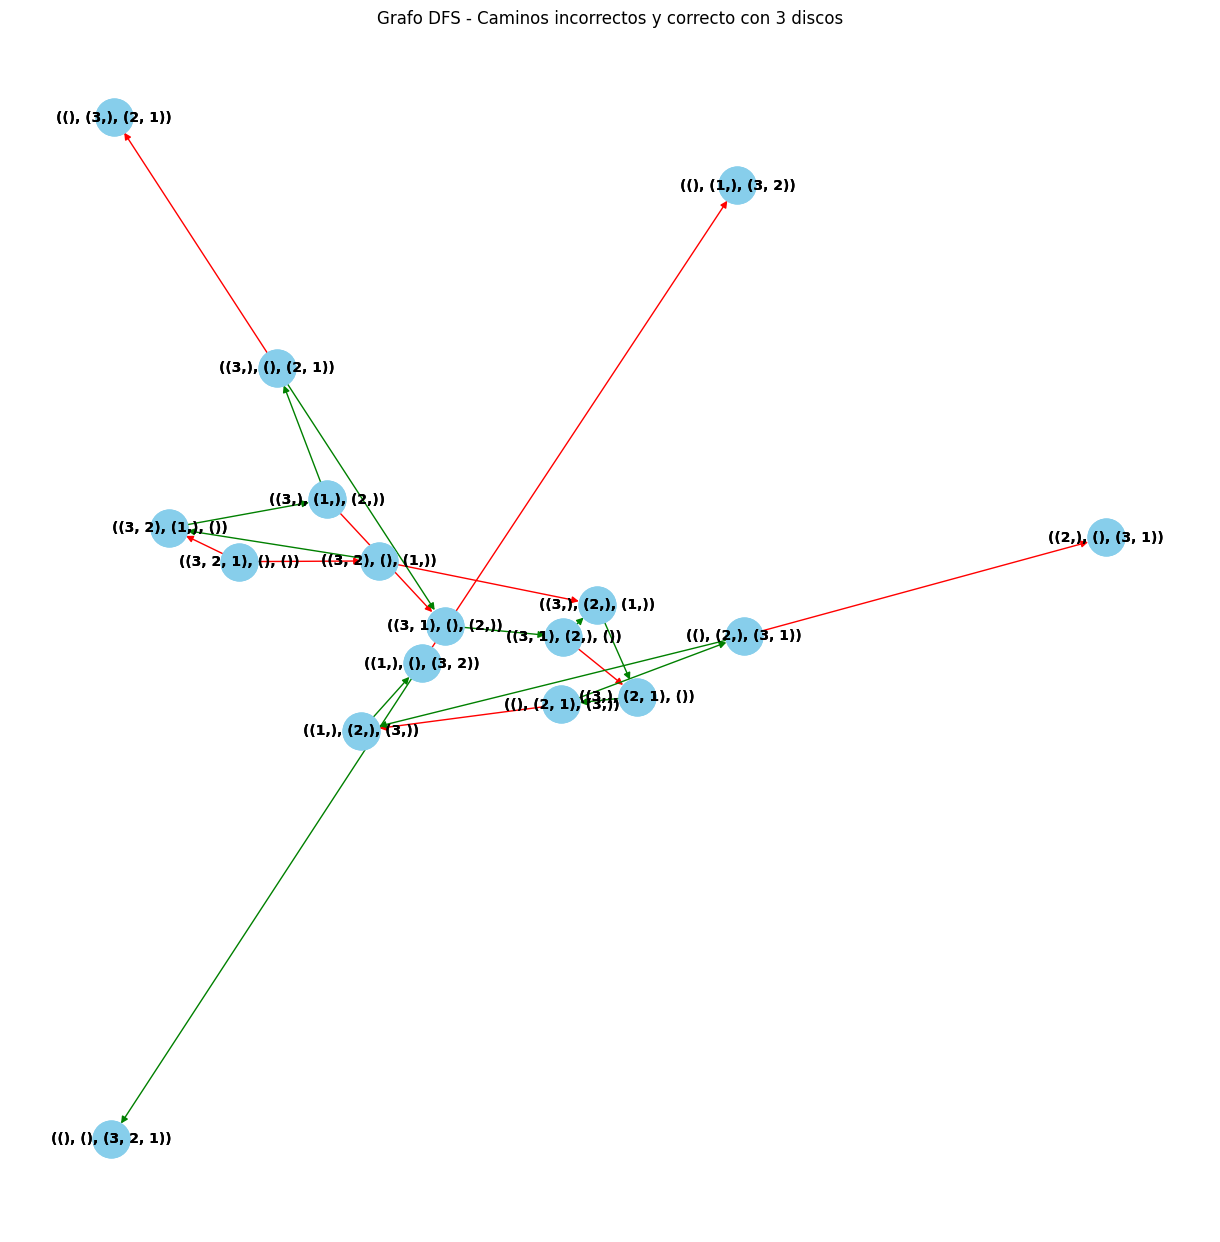

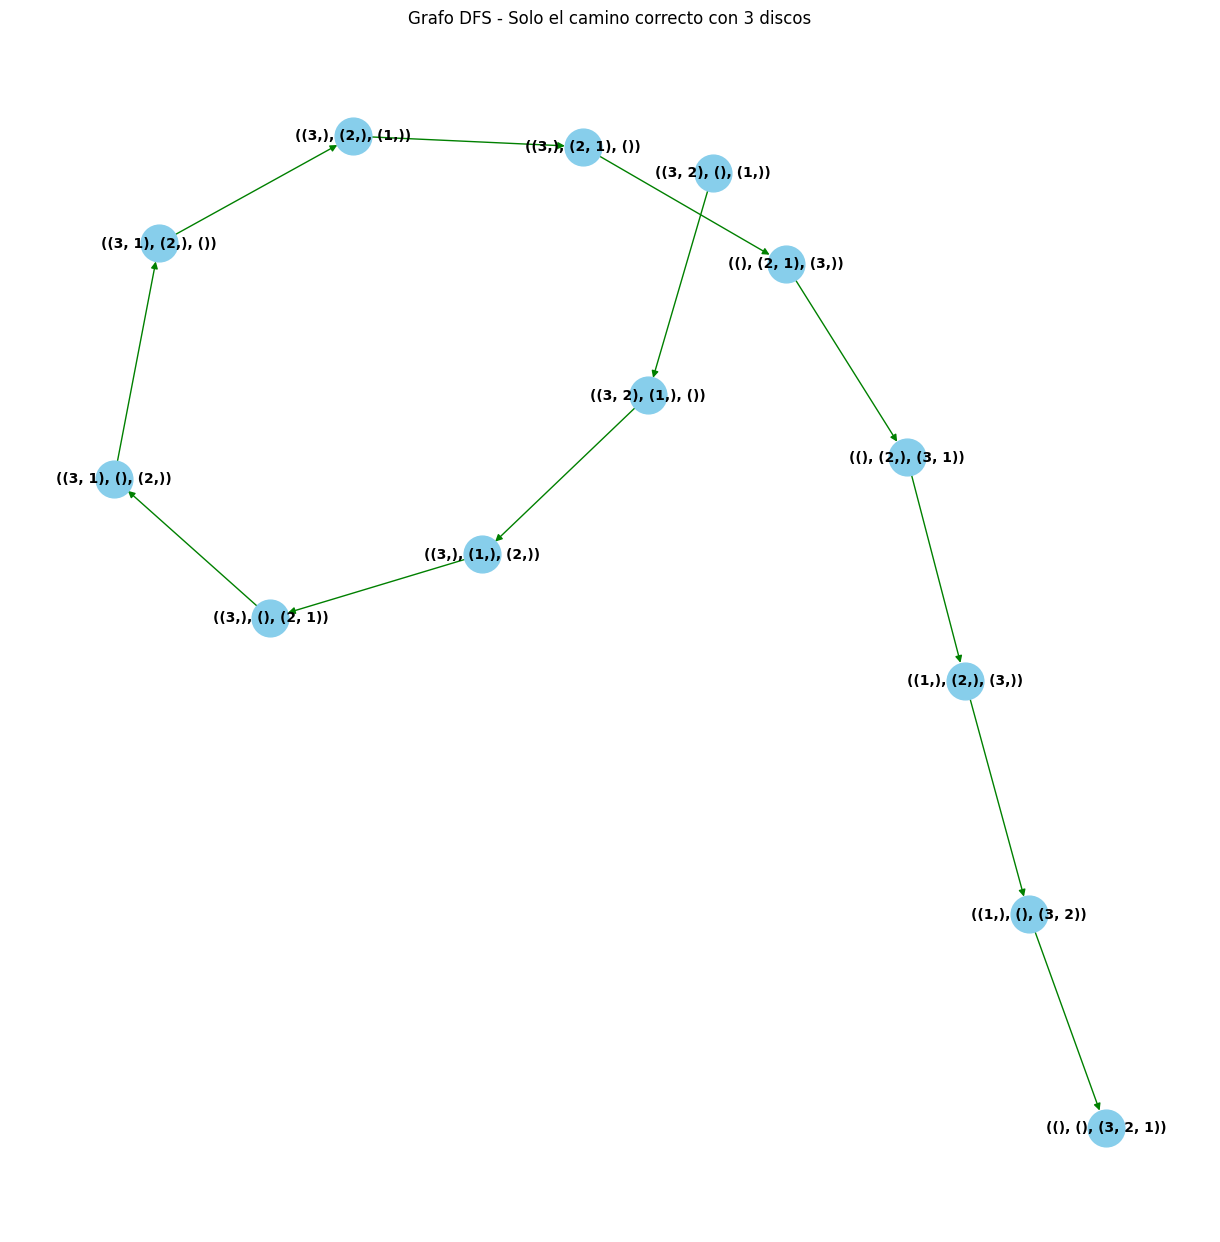

Solución DFS con 3 discos: [(0, 2), (2, 1), (0, 2), (1, 2), (2, 0), (2, 1), (0, 2), (2, 1), (0, 2), (1, 2), (2, 0), (1, 2), (0, 2)]


In [11]:
import networkx as nx
import matplotlib.pyplot as plt

def dfs_hanoi_graph(n):
    # Crea un grafo vacío
    G = nx.DiGraph()

    # Estado inicial (todos los discos en la torre 0)
    initial_state = (tuple(range(n, 0, -1)), (), ())

    # Estado objetivo (todos los discos en la torre 2)
    goal_state = ((), (), tuple(range(n, 0, -1)))

    # Pila para DFS y un conjunto para verificar los estados ya visitados
    stack = [(initial_state, [])]  # Guarda el estado actual y el camino recorrido
    visited = set()

    # DFS loop
    while stack:
        current_state, path = stack.pop()

        if current_state == goal_state:
            return G, path  # Retornar el grafo y el camino encontrado

        if current_state in visited:
            continue

        visited.add(current_state)

        # Generar movimientos posibles
        for source in range(3):  # Tres torres
            if current_state[source]:  # Verificar si hay discos en la torre source
                disk_to_move = current_state[source][-1]  # Disco más pequeño de la torre source
                for target in range(3):
                    if source != target:  # No mover a la misma torre
                        # Regla 1: Solo se puede mover un disco a la vez (esto se cumple automáticamente)
                        # Regla 2: Un disco grande no puede colocarse sobre un disco pequeño
                        if not current_state[target] or disk_to_move < current_state[target][-1]:
                            new_state = list(map(list, current_state))  # Copiar el estado actual
                            new_state[source].pop()  # Quitar el disco de la torre source
                            new_state[target].append(disk_to_move)  # Moverlo a la torre target
                            new_state = tuple(map(tuple, new_state))  # Convertir a tupla para que sea hashable

                            if new_state not in visited:
                                G.add_edge(current_state, new_state)  # Añadir la transición como una arista en el grafo
                                stack.append((new_state, path + [(source, target)]))

    return G, None  # Si no hay solución (no debería pasar en Torres de Hanoi)

def draw_solution_paths(G, solution, n):
    # Crear subgrafos para caminos correctos e incorrectos
    correct_edges = []
    incorrect_edges = []

    # Crear lista de estados a partir del camino de solución
    if solution:
        solution_states = [()]
        current_state = (tuple(range(n, 0, -1)), (), ())
        for move in solution:
            source, target = move
            current_state = list(map(list, current_state))
            disk = current_state[source].pop()
            current_state[target].append(disk)
            current_state = tuple(map(tuple, current_state))
            solution_states.append(current_state)

        # Rellenar aristas correctas e incorrectas
        for edge in G.edges():
            if edge in zip(solution_states[:-1], solution_states[1:]):
                correct_edges.append(edge)
            else:
                incorrect_edges.append(edge)

    # Grafo 1: Visualización general de todos los caminos incorrectos y el correcto en verde
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)  # Posiciones de los nodos para la visualización
    nx.draw(G, pos, with_labels=True, node_size=700, edge_color='red', edgelist=incorrect_edges, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
    nx.draw(G, pos, with_labels=True, node_size=700, edge_color='green', edgelist=correct_edges, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
    plt.title(f"Grafo DFS - Caminos incorrectos y correcto con {n} discos")
    plt.show()

    # Grafo 2: Visualización simplificada solo con el camino correcto
    plt.figure(figsize=(12, 12))
    G_simplified = nx.DiGraph()
    G_simplified.add_edges_from(correct_edges)  # Solo añadir las aristas correctas al nuevo grafo
    pos_simplified = nx.spring_layout(G_simplified)  # Layout para el grafo simplificado
    nx.draw(G_simplified, pos_simplified, with_labels=True, node_size=700, edge_color='green', node_color='skyblue', font_size=10, font_color='black', font_weight='bold')
    plt.title(f"Grafo DFS - Solo el camino correcto con {n} discos")
    plt.show()

# Ejecutar el DFS para 3 discos y generar el grafo
n = 3
G, solution = dfs_hanoi_graph(n)

# Visualizar los caminos correctos e incorrectos
draw_solution_paths(G, solution, n)

# Imprimir la solución en pasos
print(f"Solución DFS con {n} discos: {solution}")
